In [532]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [533]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Device: ", device)

random_seed = 1447
torch.manual_seed(random_seed)

Device:  cuda


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [535]:
model = Net().to(device)
epochs = 50
lr = 0.005
criterion = nn.CrossEntropyLoss()

# optimizer = torch.optim.SGD(model.parameters(), lr=lr)
# optimizer = torch.optim.Adam(model.parameters(),lr=lr)
optimizer = torch.optim.Adafactor(model.parameters(), lr=lr)
# optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
# optimizer = torch.optim.RAdam(model.parameters(), lr=lr)
# optimizer = torch.optim.NAdam(model.parameters(), lr=lr)

In [536]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y = datasets.load_iris(return_X_y=True)

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.FloatTensor(X_train).to(device)
X_test = torch.FloatTensor(X_test).to(device)
y_train = torch.LongTensor(y_train).to(device)
y_test = torch.LongTensor(y_test).to(device)

In [537]:
def predict():
    model.eval()

    with torch.no_grad():
        output = model(X_test)
        accuracy = (torch.argmax(output, dim=1) == y_test).type(torch.FloatTensor).mean()
        
        return accuracy.item()

In [538]:
def train():
    train_losses = []
    test_accuracy_list = []

    for epoch in range(epochs):
        # Train
        model.train()

        optimizer.zero_grad()
        
        outputs = model(X_train)

        loss_train = criterion(outputs, y_train)
        train_losses.append(loss_train.item())

        loss_train.backward()
        optimizer.step()

        # Test
        test_accuracy = predict()
        test_accuracy_list.append(test_accuracy)

        print(f"Epoch [{epoch}/{epochs}]: Train loss: {loss_train}, Test loss: {test_accuracy}")

    return (train_losses, test_accuracy_list)

In [ ]:
import json

train_losses, test_accuracy = train()
accuracy = predict()

Epoch [0/50]: Train loss: 1.922278881072998, Test loss: 0.17777778208255768
Epoch [1/50]: Train loss: 1.76176118850708, Test loss: 0.2222222238779068
Epoch [2/50]: Train loss: 1.6074204444885254, Test loss: 0.2666666805744171
Epoch [3/50]: Train loss: 1.4629465341567993, Test loss: 0.31111112236976624
Epoch [4/50]: Train loss: 1.3318005800247192, Test loss: 0.4000000059604645
Epoch [5/50]: Train loss: 1.211161494255066, Test loss: 0.46666666865348816
Epoch [6/50]: Train loss: 1.0997512340545654, Test loss: 0.5111111402511597
Epoch [7/50]: Train loss: 1.0014642477035522, Test loss: 0.5333333611488342
Epoch [8/50]: Train loss: 0.9150058031082153, Test loss: 0.6222222447395325
Epoch [9/50]: Train loss: 0.8395261764526367, Test loss: 0.7111111283302307
Epoch [10/50]: Train loss: 0.7732834815979004, Test loss: 0.7555555701255798
Epoch [11/50]: Train loss: 0.7144293189048767, Test loss: 0.800000011920929
Epoch [12/50]: Train loss: 0.6625379323959351, Test loss: 0.7777777910232544
Epoch [13/5

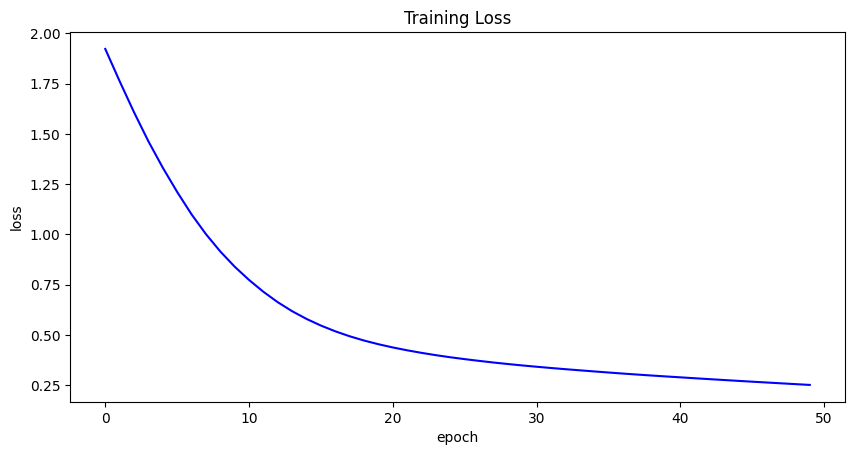

In [ ]:
import matplotlib.pyplot as plt

def plot_train_losses(train_losses, path=None):
    plt.figure().set_figwidth(10)
    plt.plot(train_losses, '-b')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Training Loss')
    plt.show()

    if type(path) == str:
        plt.savefig(path)

plot_train_losses(train_losses)